## Import data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_price_path = '/kaggle/input/home-data-for-ml-course/train.csv'
house_price = pd.read_csv(house_price_path, index_col='Id')

house_price_test_path = '/kaggle/input/home-data-for-ml-course/test.csv'
house_price_test = pd.read_csv(house_price_test_path, index_col='Id')

In [3]:
house_price.shape

(1460, 80)

In [4]:
house_price_test.shape

(1459, 79)

In [5]:
data = house_price.copy()
data_test = house_price_test.copy()

In [6]:
list(data.columns.unique()) == list(data_test.columns.unique())

False

## Handling missing data

In [7]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

### Numeric data

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [9]:
# Match a column dtype = int64 and float64
numerical_cols = list(np.where((data.dtypes == np.int64) | (data.dtypes == np.float64))[0])
imp_mean.fit(data.iloc[:,numerical_cols])
data[data.columns[numerical_cols]] = imp_mean.transform(data.iloc[:,numerical_cols])
data.columns[numerical_cols]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
numerical_cols_test = list(np.where((data_test.dtypes == np.int64) | (data_test.dtypes == np.float64))[0])
imp_mean.fit(data_test.iloc[:,numerical_cols_test])
data_test[data_test.columns[numerical_cols_test]] = imp_mean.transform(data_test.iloc[:,numerical_cols_test])
data_test.columns[numerical_cols_test]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### String data

In [11]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [12]:
# Match a column dtype = object
string_cols = list(np.where((data.dtypes == object))[0])
imp_mean.fit(data.iloc[:,string_cols])
data[data.columns[string_cols]] = imp_mean.transform(data.iloc[:,string_cols])
data.columns[string_cols]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
string_cols_test = list(np.where((data_test.dtypes == object))[0])
imp_mean.fit(data_test.iloc[:,string_cols_test])
data_test[data_test.columns[string_cols_test]] = imp_mean.transform(data_test.iloc[:,string_cols_test])
data_test.columns[string_cols_test]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Recheck the missing data

In [14]:
data[data[data.columns[-1]].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [15]:
data_test[data_test[data_test.columns[-1]].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,


In [16]:
string_cols_names = data.columns[string_cols].copy()
string_cols_names

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
def encoding(data, string_col_list, threshold=10):
    for col in string_col_list:
#         length = len(data[col].unique())
#         if length == 2 or length > threshold:
        print(f"Label encoding for column: {col}")
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col])
#         else:
#             print(f"One-hot encoding for column: {col}")
#             data = pd.get_dummies(data, columns=[col])

    return data

In [18]:
temp = encoding(data,string_cols_names)

Label encoding for column: MSZoning
Label encoding for column: Street
Label encoding for column: Alley
Label encoding for column: LotShape
Label encoding for column: LandContour
Label encoding for column: Utilities
Label encoding for column: LotConfig
Label encoding for column: LandSlope
Label encoding for column: Neighborhood
Label encoding for column: Condition1
Label encoding for column: Condition2
Label encoding for column: BldgType
Label encoding for column: HouseStyle
Label encoding for column: RoofStyle
Label encoding for column: RoofMatl
Label encoding for column: Exterior1st
Label encoding for column: Exterior2nd
Label encoding for column: MasVnrType
Label encoding for column: ExterQual
Label encoding for column: ExterCond
Label encoding for column: Foundation
Label encoding for column: BsmtQual
Label encoding for column: BsmtCond
Label encoding for column: BsmtExposure
Label encoding for column: BsmtFinType1
Label encoding for column: BsmtFinType2
Label encoding for column: H

In [19]:
temp.shape

(1460, 80)

In [20]:
temp_test = encoding(data_test,string_cols_names)

Label encoding for column: MSZoning
Label encoding for column: Street
Label encoding for column: Alley
Label encoding for column: LotShape
Label encoding for column: LandContour
Label encoding for column: Utilities
Label encoding for column: LotConfig
Label encoding for column: LandSlope
Label encoding for column: Neighborhood
Label encoding for column: Condition1
Label encoding for column: Condition2
Label encoding for column: BldgType
Label encoding for column: HouseStyle
Label encoding for column: RoofStyle
Label encoding for column: RoofMatl
Label encoding for column: Exterior1st
Label encoding for column: Exterior2nd
Label encoding for column: MasVnrType
Label encoding for column: ExterQual
Label encoding for column: ExterCond
Label encoding for column: Foundation
Label encoding for column: BsmtQual
Label encoding for column: BsmtCond
Label encoding for column: BsmtExposure
Label encoding for column: BsmtFinType1
Label encoding for column: BsmtFinType2
Label encoding for column: H

In [21]:
temp_test.shape

(1459, 79)

## Feature Selection

- ### Correlation

In [22]:
temp.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.357056,-0.139781,-0.024969,-0.105995,0.119289,-0.002940,-2.284384e-02,0.075910,...,0.008283,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-0.106363,-0.034452,0.087654,-0.052039,0.061887,-0.017854,-1.192034e-03,-0.009895,...,-0.003128,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.357056,-0.106363,1.000000,0.306795,-0.037323,0.133433,-0.144931,-0.075647,-5.447825e-18,-0.181253,...,0.180868,-0.191630,-0.036751,-0.005395,0.001168,0.010158,0.006768,-0.030846,0.058464,0.334901
LotArea,-0.139781,-0.034452,0.306795,1.000000,-0.197131,0.060105,-0.165315,-0.149083,1.012318e-02,-0.121161,...,0.077672,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.037323,-0.197131,1.000000,-0.015720,-0.010224,0.115995,1.681767e-03,0.013960,...,0.004413,-0.004067,-0.029386,0.146712,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.031496,0.010158,0.001205,0.003690,0.013094,-0.033455,-0.011599,-5.155166e-02,0.018902,...,-0.033737,0.036368,-0.009892,-0.014193,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,-0.021407,-0.020628,0.006768,-0.014261,-0.025043,0.020944,0.036449,0.020507,2.335254e-02,-0.005992,...,-0.059689,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.012464,0.097437,-0.030846,0.012292,0.014339,0.008205,-0.000911,-0.025754,-1.267697e-01,0.014325,...,0.011009,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.024940,0.009494,0.058464,0.034169,0.006064,0.035717,-0.038118,0.033809,-8.970068e-02,0.051579,...,-0.067251,0.097425,0.100675,0.003192,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


<Axes: >

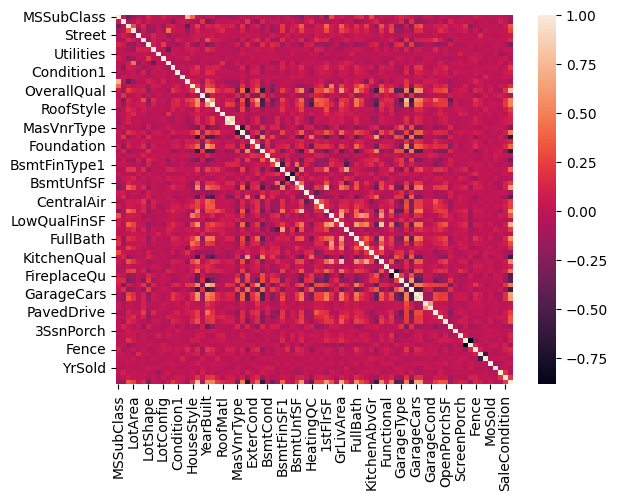

In [23]:
sns.heatmap(temp.corr())

In [24]:
temp_dict = temp.corrwith(temp['SalePrice']).to_dict()
temp_dict

{'MSSubClass': -0.08428413512659531,
 'MSZoning': -0.16687220265320643,
 'LotFrontage': 0.3349008515405508,
 'LotArea': 0.2638433538714057,
 'Street': 0.04103553550004948,
 'Alley': 0.13986774969168472,
 'LotShape': -0.25557987048712216,
 'LandContour': 0.015453241660960343,
 'Utilities': -0.014314296147248806,
 'LotConfig': -0.06739602315941742,
 'LandSlope': 0.05115224817946654,
 'Neighborhood': 0.21085146582230319,
 'Condition1': 0.09115491154092832,
 'Condition2': 0.007512734036333065,
 'BldgType': -0.08559060818352929,
 'HouseStyle': 0.18016262334399105,
 'OverallQual': 0.7909816005838044,
 'OverallCond': -0.07785589404867803,
 'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113864,
 'RoofStyle': 0.2224052924071383,
 'RoofMatl': 0.13238311192778812,
 'Exterior1st': 0.10355101119090569,
 'Exterior2nd': 0.10376553702965834,
 'MasVnrType': -0.28155385812500966,
 'MasVnrArea': 0.47524131677366865,
 'ExterQual': -0.6368836943991134,
 'ExterCond': 0.11730265704316553,
 'Fo

In [25]:
# If select very high correlation will high rate to encouter to multicolinear feature
# If drop very low correlation will increasing efficiency of training

# fair_corr = { column:value for column,value in temp_dict.items() if value >0.5}
fair_corr = {column: value for column, value in temp_dict.items() if 0.5 <= value <= 0.7 or -0.7 <= value <= -0.5}
if fair_corr.keys() == 'SalePrice':
    del fair_corr['SalePrice']

In [26]:
fair_corr

{'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113864,
 'ExterQual': -0.6368836943991134,
 'BsmtQual': -0.6208861300191701,
 'TotalBsmtSF': 0.6135805515591956,
 '1stFlrSF': 0.6058521846919147,
 'FullBath': 0.5606637627484449,
 'KitchenQual': -0.5891887782994201,
 'TotRmsAbvGrd': 0.5337231555820282,
 'GarageFinish': -0.5492467563332116,
 'GarageCars': 0.6404091972583529,
 'GarageArea': 0.6234314389183618}

In [27]:
len(fair_corr)

12

In [28]:
col_selected = list(fair_corr.keys())

- ### Mutal information

In [29]:
discrete_features = temp.dtypes == int

In [30]:
temp_y = data.SalePrice.copy()

In [31]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [32]:
mi_scores = make_mi_scores(temp, temp_y, discrete_features)
mi_scores = mi_scores.drop('SalePrice', axis=0)
mi_scores

OverallQual     5.569761e-01
Neighborhood    5.283070e-01
GrLivArea       4.841271e-01
GarageCars      3.730245e-01
TotalBsmtSF     3.681309e-01
                    ...     
Utilities       1.887379e-15
PoolQC          0.000000e+00
MoSold          0.000000e+00
LowQualFinSF    0.000000e+00
BsmtHalfBath    0.000000e+00
Name: MI Scores, Length: 79, dtype: float64

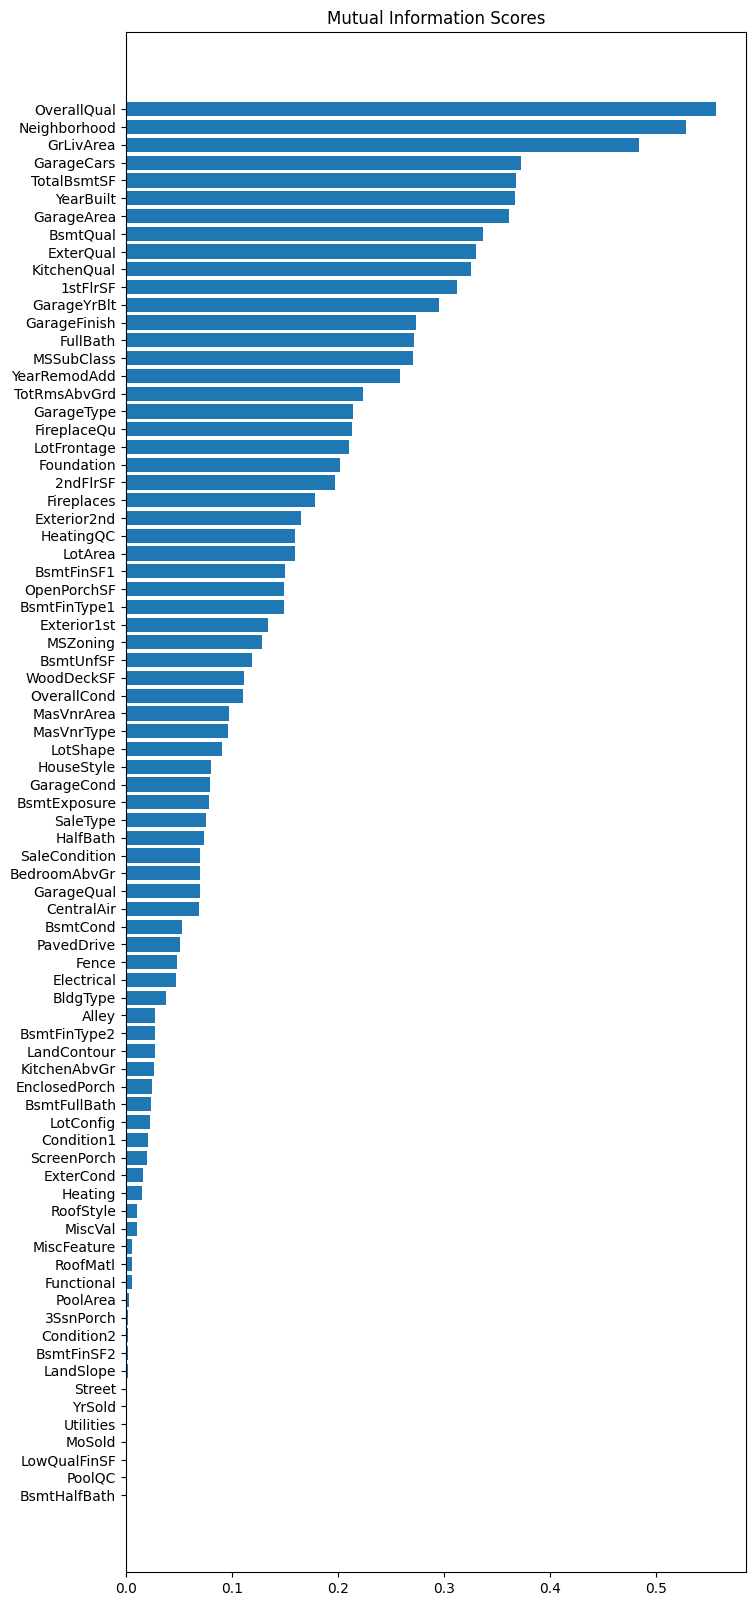

In [33]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 20))
plot_mi_scores(mi_scores)

In [34]:
# Calculate a threshold value, for example, the top 20% of features
# threshold_percentile = 0.8
# Upper threshold for soimtimes very high mutal information will may be very high correlation

Lower_threshold_percentile = 0.85  # top 15% of features 
Upper_threshold_percentile = 0.985  # top 1.5% of features 
Lower_threshold_value = np.percentile(mi_scores, 100*Lower_threshold_percentile )
Upper_threshold_value = np.percentile(mi_scores, 100*Upper_threshold_percentile)

print(f"Lower threshold Value: {Lower_threshold_value}")
print(f"Upper threshold Value: {Upper_threshold_value}")

Lower threshold Value: 0.2803326171746072
Upper threshold Value: 0.5207964106690447


In [35]:
score = mi_scores.to_dict()
selected = {cols:values for cols,values in score.items() if values>Lower_threshold_value and values<Upper_threshold_value}
selected

{'GrLivArea': 0.4841270708391656,
 'GarageCars': 0.3730245208505576,
 'TotalBsmtSF': 0.36813088699672747,
 'YearBuilt': 0.36738130569346206,
 'GarageArea': 0.3613287038563353,
 'BsmtQual': 0.33653079409442044,
 'ExterQual': 0.33073610953004806,
 'KitchenQual': 0.32548158704771946,
 '1stFlrSF': 0.31194002485066497,
 'GarageYrBlt': 0.2951785177005313}

In [36]:
len(selected)

10

In [37]:
mutual_feature = selected.keys()

In [38]:
mutual_feature 

dict_keys(['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'BsmtQual', 'ExterQual', 'KitchenQual', '1stFlrSF', 'GarageYrBlt'])

- ### Combine correlation and mutal information of feature selection

In [39]:
combine_feature = list(set(col_selected).union(set(mutual_feature)))

In [40]:
combine_feature 

['TotalBsmtSF',
 'GarageFinish',
 'GarageArea',
 'YearRemodAdd',
 'FullBath',
 'BsmtQual',
 'GarageYrBlt',
 'KitchenQual',
 'GrLivArea',
 'ExterQual',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'YearBuilt',
 'GarageCars']

In [41]:
len(combine_feature)

14

In [42]:
X = temp[combine_feature].copy()
y = data['SalePrice'].copy()
X_test = temp_test[combine_feature].copy()

In [43]:
del temp, temp_test, temp_y

## Generalize the data (Train test Split)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=0)

## Model: XGBoost and Evalaute: R2, MAE

In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [46]:
import xgboost as xgb

model = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=10,
    learning_rate=0.3
)

model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Test model

In [47]:
y_pred = model.predict(X_validate)

R2 = r2_score(y_validate, y_pred)
MAE = mean_absolute_error(y_validate, y_pred)

print(f'R2 score: {R2}\nMean absolute error: {MAE}')

R2 score: 0.7918390915975306
Mean absolute error: 23766.422878317637


### Evaluate model

In [48]:
# Fill in the line below: get test predictions
y_pred_test = model.predict(X_test)

# R2 = r2_score(y_test, y_pred_test)
# MAE = mean_absolute_error(y_test, y_pred_test)

# print(f'R2 score: {R2}\nMean absolute error: {MAE}')

In [49]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': y_pred_test})
output.to_csv('submission.csv', index=False)

In [50]:
# pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})